This notebook is the feature exploration of the GTZAN cleaned feature dataset

please make sure all needed libraries are installed

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

df = pd.read_csv("features_30_cleaned.csv")
df.head()

,filename,chroma_stft_mean,chroma_stft_var,loudness,loudness_variance,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_var,rolloff_var,zero_crossing_rate_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,genre
0,blues.00000.wav,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,85882.761315,9.015054e+05,0.083045,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,213843.755497,2.977893e+06,0.056040,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,76254.192257,7.840345e+05,0.076291,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,166441.494769,1.493194e+06,0.033309,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,88445.209036,1.572978e+06,0.101461,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


**METADATA EXPLORATION**

In [2]:
print("Genre Counts")
print(df['genre'].value_counts())

print("\nCheck for Nulls")
print(df.isnull().sum().values)

#Numeric metadata columns
numeric_metadata_cols = df.select_dtypes(include='number')
if len(numeric_metadata_cols) > 0:
    print("\n")
    print("The stats of numeric metadata columns:")
    print(numeric_metadata_cols.describe())

df.info()

Genre Counts
genre
blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: count, dtype: int64

Check for Nulls
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


The stats of numeric metadata columns:
       chroma_stft_mean  chroma_stft_var     loudness  loudness_variance  \
count       1000.000000      1000.000000  1000.000000        1000.000000   
mean           0.378682         0.086340     0.130930           0.003051   
std            0.081705         0.007735     0.065683           0.003634   
min            0.171939         0.044555     0.005276           0.000004   
25%            0.319562         0.082298     0.086657           0.000942   
50%            0.383148         0.086615     0.122443           0.001816   
75%            0.435942         0.091256     0.175682           0.003577   
ma

**FEATURE DISTRIBUTION BY GENRE**

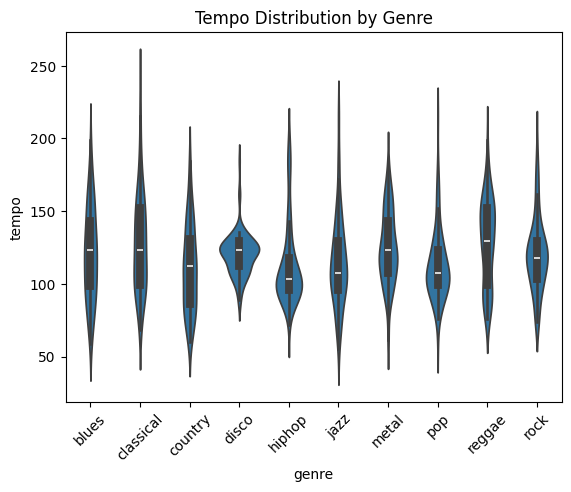

In [3]:
sns.violinplot(x='genre', y='tempo', data=df)
plt.title("Tempo Distribution by Genre")
plt.xticks(rotation=45)
plt.show()

       chroma_stft_mean  chroma_stft_var     loudness  loudness_variance  \
count       1000.000000      1000.000000  1000.000000        1000.000000   
mean           0.378682         0.086340     0.130930           0.003051   
std            0.081705         0.007735     0.065683           0.003634   
min            0.171939         0.044555     0.005276           0.000004   
25%            0.319562         0.082298     0.086657           0.000942   
50%            0.383148         0.086615     0.122443           0.001816   
75%            0.435942         0.091256     0.175682           0.003577   
max            0.663685         0.108111     0.397973           0.027679   

       spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_var  \
count             1000.000000           1.000000e+03             1000.000000   
mean              2201.780898           4.696916e+05           137079.155165   
std                715.960600           4.008995e+05            96455.66632

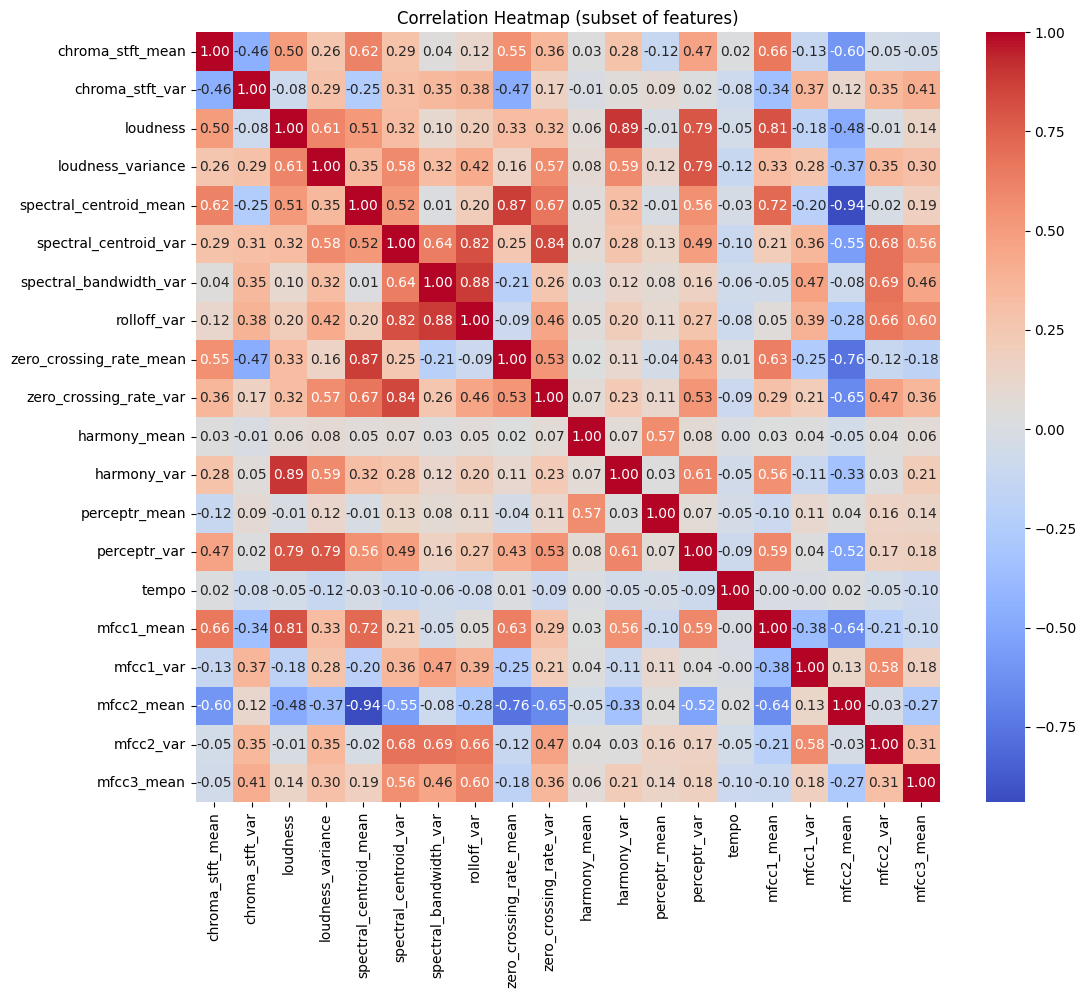

In [4]:
print(df.describe())

numeric_cols = df.select_dtypes(include='number')

#variance per column
print(numeric_cols.var())

#looking for missing values
print(df.isnull().sum())

#correlation
subset_cols = numeric_cols.columns[:20]
plt.figure(figsize=(12,10))
sns.heatmap(numeric_cols[subset_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (subset of features)")
plt.show()

**NUMERIC FEATURE EXPLAINATION**

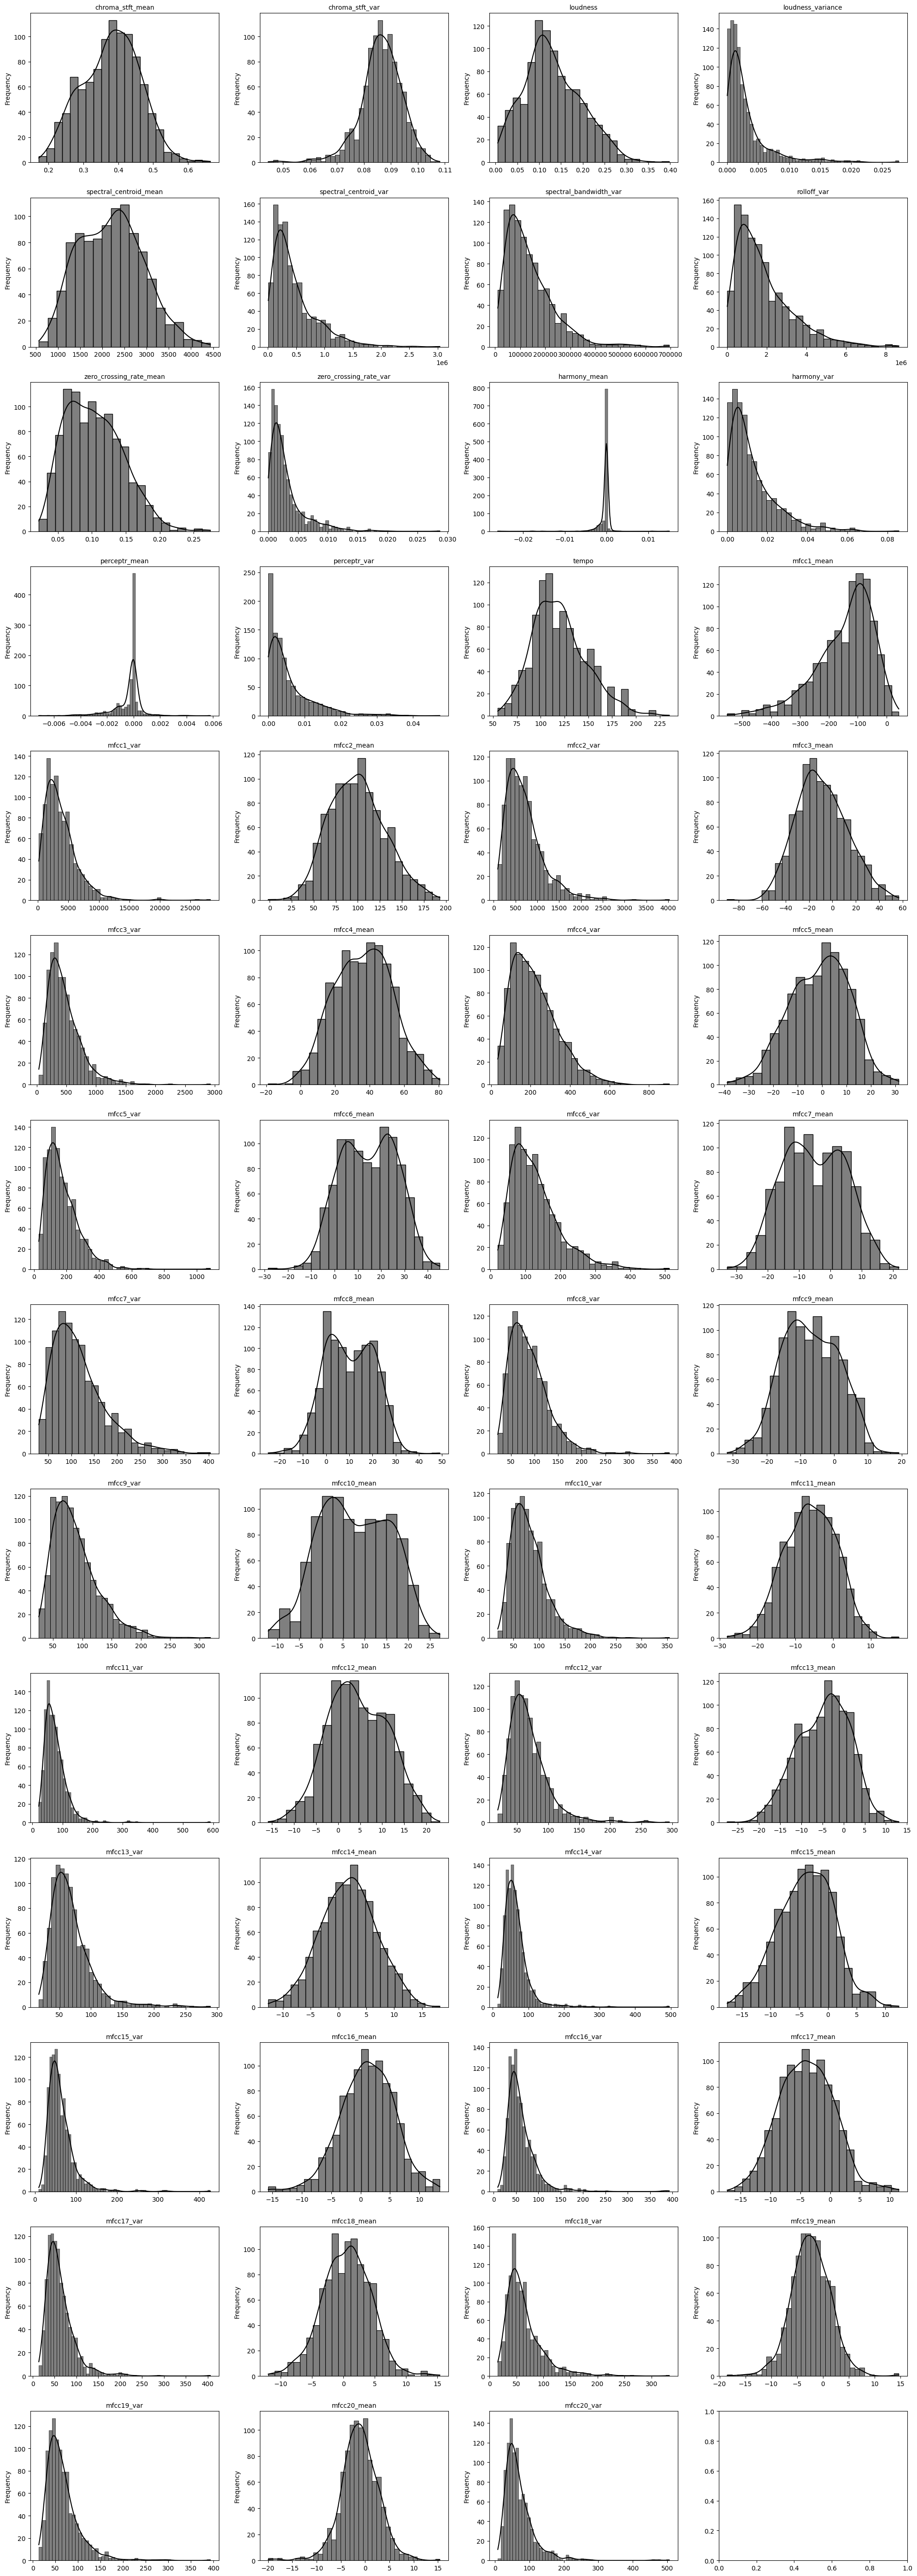

In [5]:
#selecting numeric columns
numeric_cols = df.select_dtypes(include='number')

num_cols = 4
num_rows = (len(numeric_cols.columns) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 4*num_rows))
axes = axes.flatten()

#plotting all numeric features
for i, col in enumerate(numeric_cols.columns):
    sns.histplot(numeric_cols[col], kde=True, ax=axes[i], color='black')
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

**TRAINING**

In [6]:
#Using all features except genre to train
X = df.drop(columns=['filename', 'genre'])

y = df['genre']

print("Features shape:", X.shape)
print("Labels shape:", y.shape)

Features shape: (1000, 55)
Labels shape: (1000,)


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


Decision Tree (with tuned hyperparameters)

In [8]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(
    max_depth=25,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)
dt_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,25
,min_samples_split,5
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred_dt = dt_model.predict(X_test)

# Accuracy & classification
print("Decision Tree Prediction")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print()
print(classification_report(y_test, y_pred_dt))

#Improvement, as it was .55 without tuned parameters!

Decision Tree Prediction
Accuracy: 0.6

              precision    recall  f1-score   support

       blues       0.59      0.80      0.68        20
   classical       0.70      0.95      0.81        20
     country       0.46      0.55      0.50        20
       disco       0.47      0.40      0.43        20
      hiphop       0.45      0.65      0.53        20
        jazz       0.73      0.55      0.63        20
       metal       0.79      0.75      0.77        20
         pop       0.76      0.65      0.70        20
      reggae       0.50      0.35      0.41        20
        rock       0.64      0.35      0.45        20

    accuracy                           0.60       200
   macro avg       0.61      0.60      0.59       200
weighted avg       0.61      0.60      0.59       200



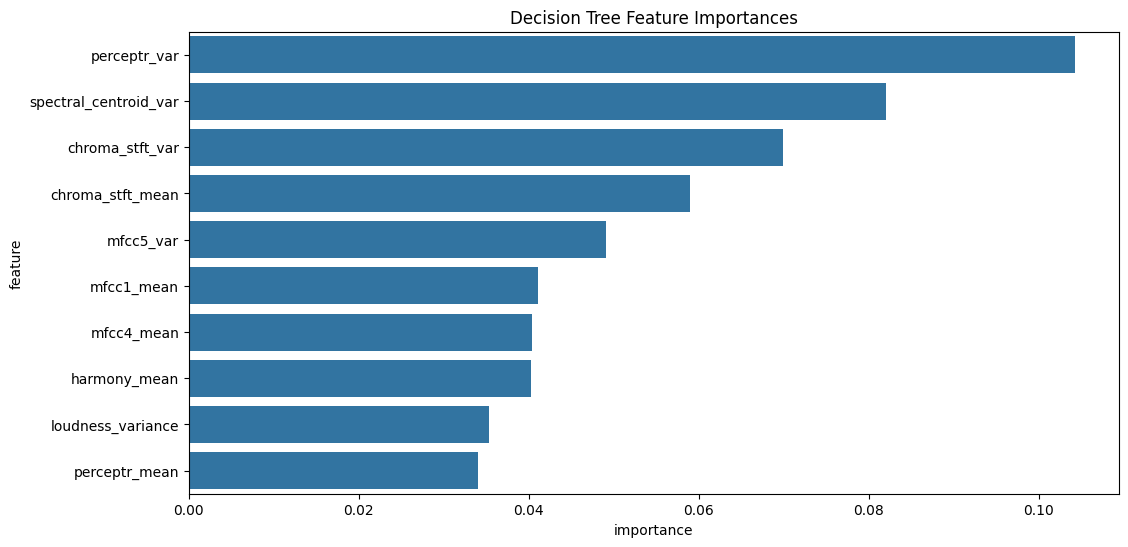

In [18]:
#Feature importance
dt_importances = dt_model.feature_importances_
dt_feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': dt_importances
}).sort_values(by='importance', ascending=False)


plt.figure(figsize=(12,6))
sns.barplot(x='importance', y='feature', data=dt_feature_importance_df.head(10))
plt.title("Decision Tree Feature Importances")
plt.show()


**Random Forest** (tuned hyperparameters)

In [27]:
rf_model = RandomForestClassifier(
    n_estimators=500,        
    max_depth=None,  
    min_samples_split=2,      
    min_samples_leaf=1,   
    max_features='sqrt',    
    class_weight='balanced', 
    random_state=42,
    n_jobs=-1                
)

rf_model.fit(X_train, y_train)

# from sklearn.model_selection import GridSearchCV

# rf = RandomForestClassifier(random_state=42)

# param_grid = {
#     'n_estimators': [200, 300, 500],
#     'max_depth': [20, 25, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2'],
#     'class_weight': [None, 'balanced']
# }

# grid_search = GridSearchCV(
#     estimator=rf,
#     param_grid=param_grid,
#     cv=5,
#     scoring='accuracy',
#     n_jobs=-1,
#     verbose=1
# )

,n_estimators,500
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [31]:
# grid_search.fit(X_train, y_train)

# # Best hyperparameters & CV accuracy
# print("Best hyperparameters:", grid_search.best_params_)
# print("Best CV accuracy:", round(grid_search.best_score_, 2))

''' result of grid search gave less accuracy of .69, 

results of this :
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best hyperparameters: {'class_weight': None, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}
Best CV accuracy: 0.72

'''

" result of grid search gave less accuracy of .69, \n\nresults of this :\nFitting 5 folds for each of 324 candidates, totalling 1620 fits\nBest hyperparameters: {'class_weight': None, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}\nBest CV accuracy: 0.72\n\n"

In [30]:
#prediction and accuracy
y_pred_rf = rf_model.predict(X_test)

print("Test Accuracy:", round(accuracy_score(y_test, y_pred_rf), 2))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_rf))

Test Accuracy: 0.7

Classification Report:

              precision    recall  f1-score   support

       blues       0.75      0.60      0.67        20
   classical       0.79      0.95      0.86        20
     country       0.89      0.80      0.84        20
       disco       0.53      0.40      0.46        20
      hiphop       0.56      0.70      0.62        20
        jazz       0.76      0.80      0.78        20
       metal       0.76      0.80      0.78        20
         pop       0.82      0.90      0.86        20
      reggae       0.50      0.50      0.50        20
        rock       0.61      0.55      0.58        20

    accuracy                           0.70       200
   macro avg       0.70      0.70      0.69       200
weighted avg       0.70      0.70      0.69       200



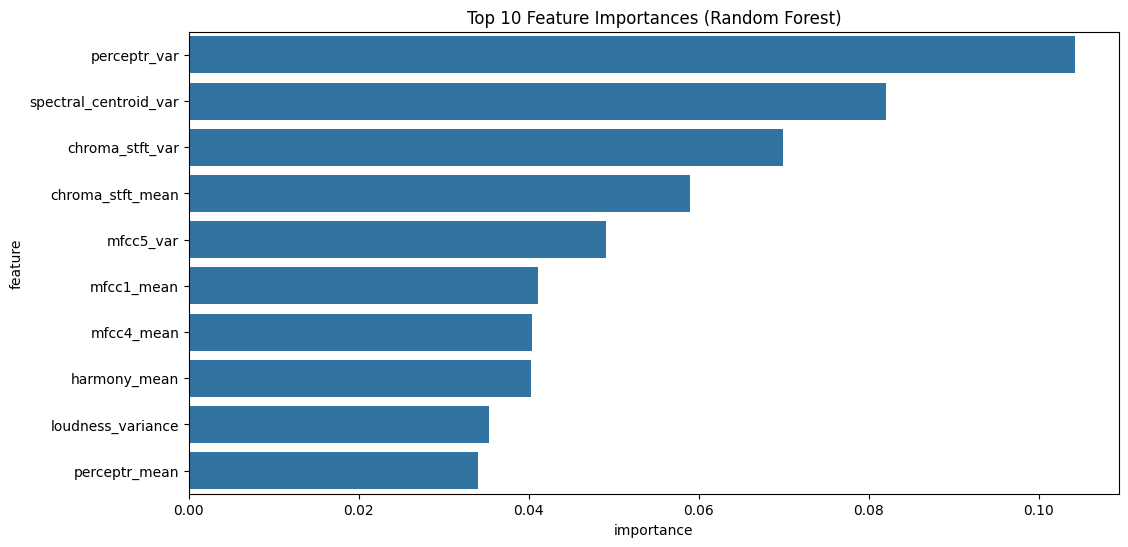

In [32]:
#Feature importance
rf_importances = rf_model.feature_importances_
features = X.columns

rf_feature_importance_df = pd.DataFrame({
    'feature': features,
    'importance': rf_importances
}).sort_values(by='importance', ascending=False)

# print("Top 10 Features:")
# print(rf_feature_importance_df.head(10))

plt.figure(figsize=(12,6))
sns.barplot(x='importance', y='feature', data=dt_feature_importance_df.head(10))
plt.title("Top 10 Feature Importances (Random Forest)")
plt.show()


**Confusion Matrix**

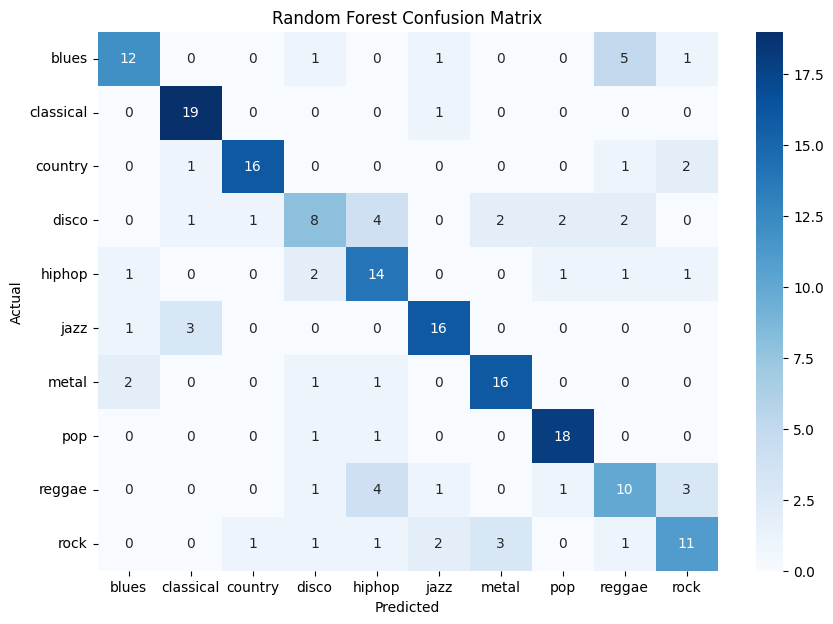

In [33]:
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=y.unique())
plt.figure(figsize=(10,7))
sns.heatmap(
    cm_rf, annot=True, fmt='d',
    xticklabels=y.unique(),
    yticklabels=y.unique(),
    cmap='Blues'
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()